### Testa flera modeller

Importera bibliotek

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

Ladda och förbered data

In [ ]:
# Ladda dataset
data = pd.read_csv("../data/klass9_matte_inlamningar_train.csv")

# Målvariabel och features
y = data["grade"]
X = data.drop(columns=["submission_id", "grade", "teacher_comment_sv"])

# Koda textkolumnen 'topic'
label_encoder = LabelEncoder()
X["topic"] = label_encoder.fit_transform(X["topic"])

# Koda betyg A–F till siffror
grade_encoder = LabelEncoder()
y_encoded = grade_encoder.fit_transform(y)

# Dela upp i träning och validering
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


Definiera modellerna att testa

In [ ]:
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42
    ),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42
    )
}

Träna och utvärdera varje modell

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"📊 {name}: {acc:.3f}")


📊 RandomForest: 0.994


c:\Users\Abo Mahmoud\Desktop\Maskininlärning_teknikhögskolan_projecktEntry tollgate\EduMate\backend\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 LogisticRegression: 0.925
📊 XGBoost: 0.994


Visa resultatet snyggt

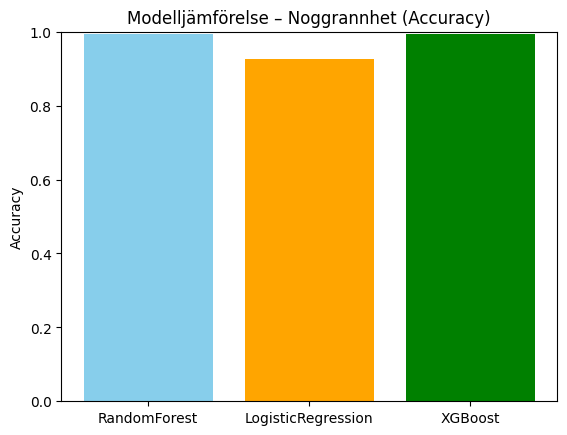

In [ ]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'green'])
plt.title("Modelljämförelse – Noggrannhet (Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

Visa detaljer för bästa modell

In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Bästa modell: {best_model_name}")
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=grade_encoder.classes_))


Bästa modell: RandomForest
              precision    recall  f1-score   support

           C       1.00      0.75      0.86         4
           D       0.94      1.00      0.97        16
           E       1.00      1.00      1.00        25
           F       1.00      1.00      1.00       115

    accuracy                           0.99       160
   macro avg       0.99      0.94      0.96       160
weighted avg       0.99      0.99      0.99       160



## Hyperparameter-tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
}

grid = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2
)

grid.fit(X_train, y_train)
print("Bästa parametrar:", grid.best_params_)
print("Bästa noggrannhet:", grid.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=6, n_es